# What is an AVL tree??

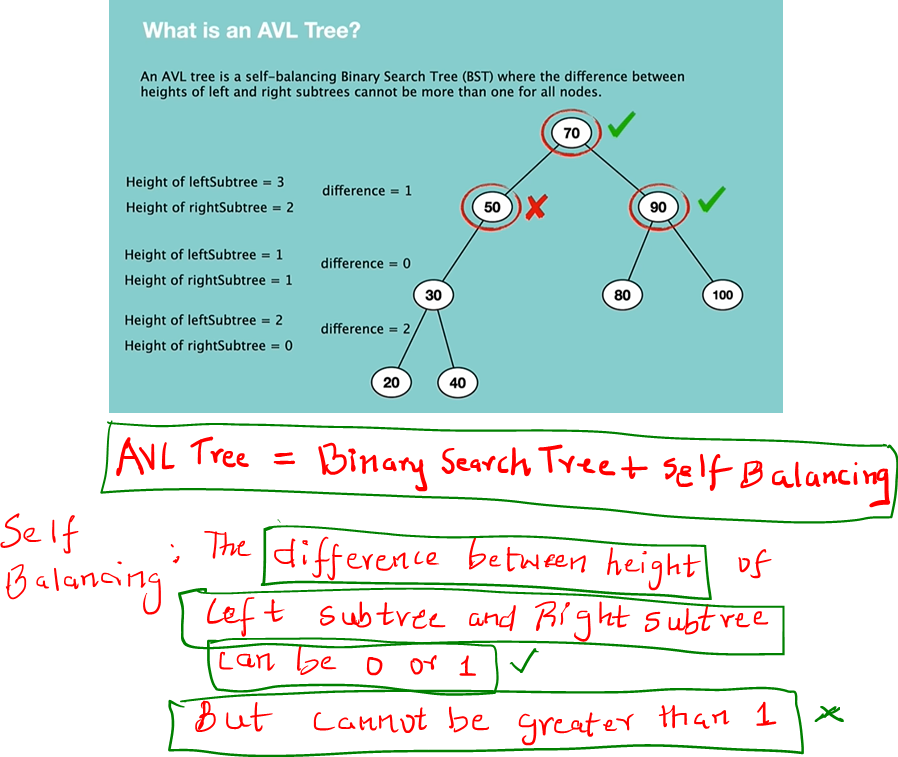

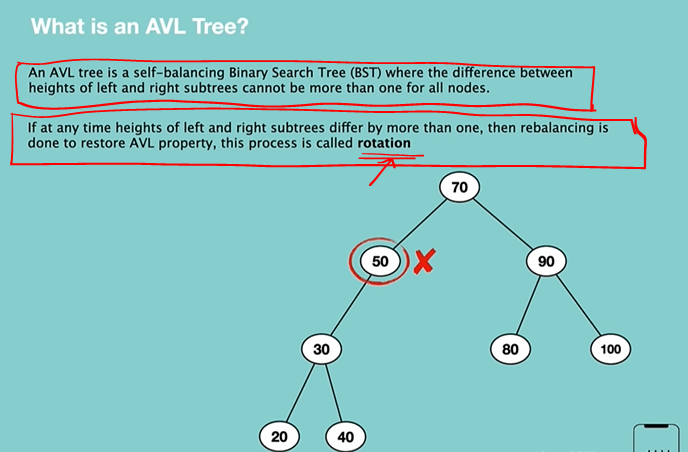

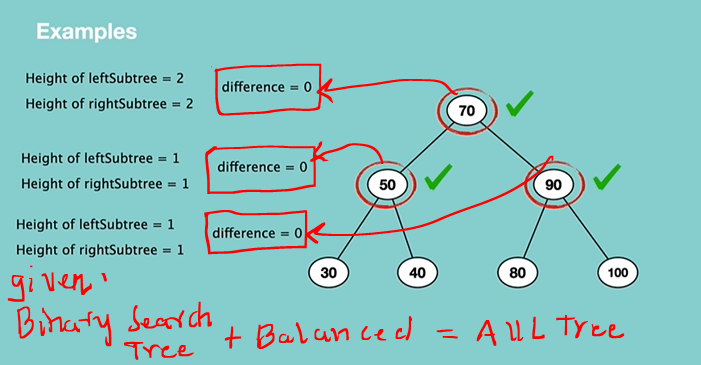

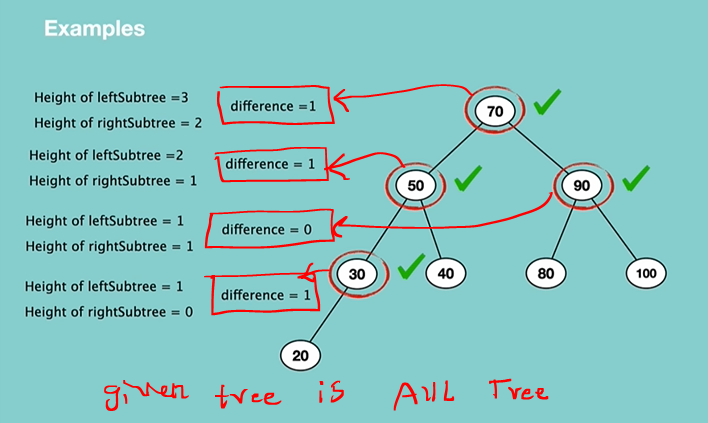

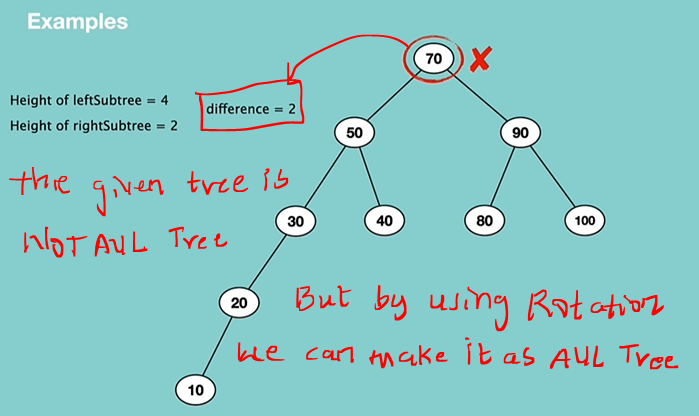

# Why AVL tree
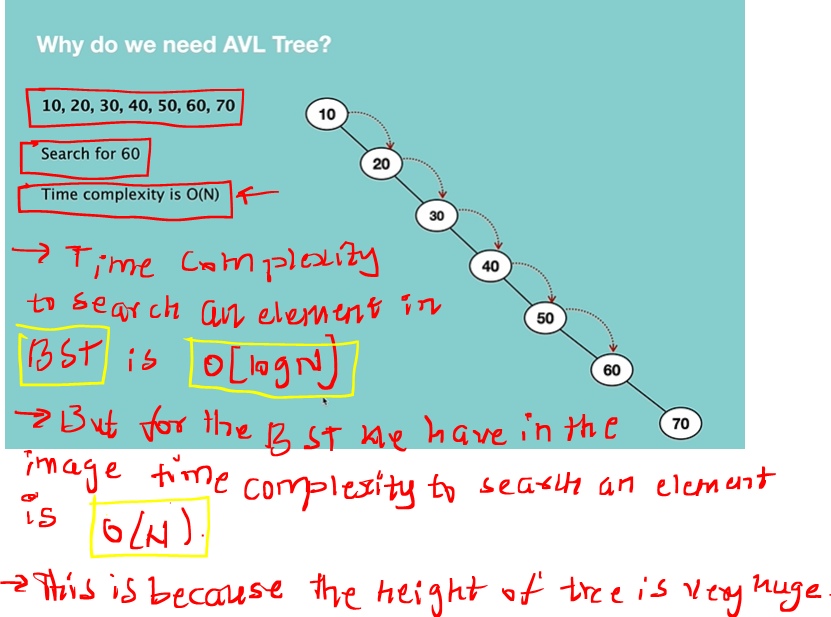


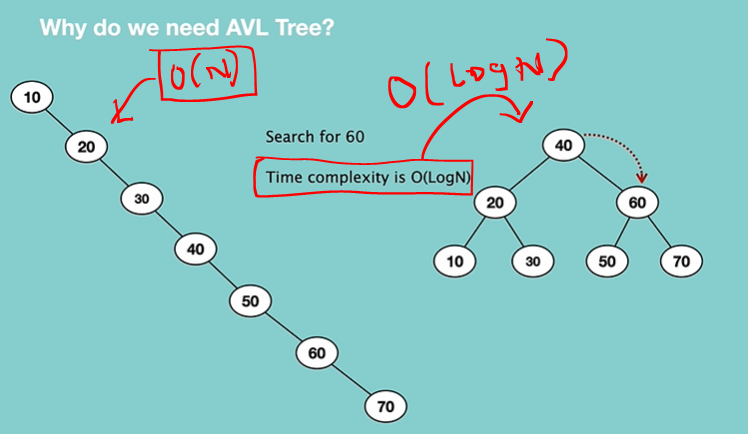

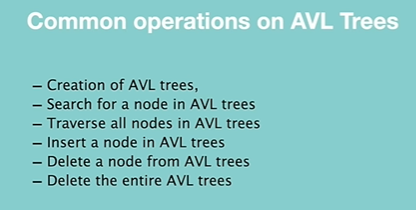

# Pre_Order_Traversal : Root , Left , Right
### Time Complexity : $O(N)$   , Space Complexity : $O(N)$ 
# In_Order_Traversal : Left , Root , Right
### Time Complexity : $O(N)$   , Space Complexity : $O(N)$ 
# Post_Order_Traversal : Left , Right , Root 
### Time Complexity : $O(N)$   , Space Complexity : $O(N)$ 
# Level_Order_Traversal : All levels of the Tree 
### Time Complexity : $O(N)$   , Space Complexity : $O(N)$ 
# Searching for a Node in AVL tree:
### Time Complexity : $O(log(N))$   , Space Complexity : $O(log(N))$ 

In [25]:
class AVLNode:
    def __init__(self, data):
        self.data =  data
        self.leftChild = None
        self.rightChild = None
        self.height = 1 # To find Whether or Not AVL tree is Balanced
        

In [26]:
T = AVLNode(70)
L_C = AVLNode(60)
R_C = AVLNode(80)

T.leftChild = L_C
T.rightChild = R_C

L_C_L_C = AVLNode(40)
L_C_R_C = AVLNode(65)

L_C.leftChild = L_C_L_C
L_C.rightChild = L_C_R_C



R_C_L_C = AVLNode(75)
R_C_R_C = AVLNode(90)

R_C.leftChild = R_C_L_C
R_C.rightChild = R_C_R_C


In [27]:
def preOrderTraversal(rootNode):
    if not rootNode:
        return
    print(rootNode.data)
    preOrderTraversal(rootNode.leftChild)
    preOrderTraversal(rootNode.rightChild)



In [28]:
preOrderTraversal(T)

70
60
40
65
80
75
90


In [16]:
def inOrderTraversal(rootNode):
    if not rootNode:
        return
    inOrderTraversal(rootNode.leftChild)
    print(rootNode.data)
    inOrderTraversal(rootNode.rightChild)



In [29]:
inOrderTraversal(T)

40
60
65
70
75
80
90


In [17]:
def postOrderTraversal(rootNode):
    if not rootNode:
        return
    postOrderTraversal(rootNode.leftChild)
    postOrderTraversal(rootNode.rightChild)
    print(rootNode.data)



In [30]:
postOrderTraversal(T)

40
65
60
75
90
80
70


In [31]:
class Queue:
    def __init__(self):
        self.list = []
        
    def __iter__(self):
        for i in self.list:
            yield i
            
    def isEmpty(self):
        if self.list == []:
            return True
        else:
            return False
    
    def enqueue(self,value):
        self.list.append(value)
        
    def dequeue(self):
        if self.isEmpty():
            return "The queue is empty"
            
        else:
            return self.list.pop(0)
    

In [34]:
def levelOrderTraversal(rootNode):
    if not rootNode:
        return
    else:
        customQueue = Queue()
        customQueue.enqueue(rootNode)
        while not(customQueue.isEmpty()):
            root = customQueue.dequeue()
            print(root.data)
            if root.leftChild is not None:
                customQueue.enqueue(root.leftChild)
            if root.rightChild is not None:
                customQueue.enqueue(root.rightChild)




In [35]:
levelOrderTraversal(T)

70
60
80
40
65
75
90


In [20]:
def searchNode(rootNode, nodeValue):
    if rootNode.data == nodeValue:
        print("The value is found")
    elif nodeValue < rootNode.data:
        if rootNode.leftChild.data == nodeValue:
            print("The value is found")
        else:
            searchNode(rootNode.leftChild, nodeValue)
    else:
        if rootNode.rightChild.data == nodeValue:
            print("The value is found")
        else:
            searchNode(rootNode.rightChild, nodeValue)


In [37]:
searchNode(T ,65)

The value is found


# Insertion Into AVL Tree
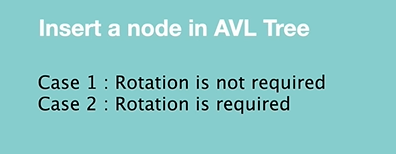

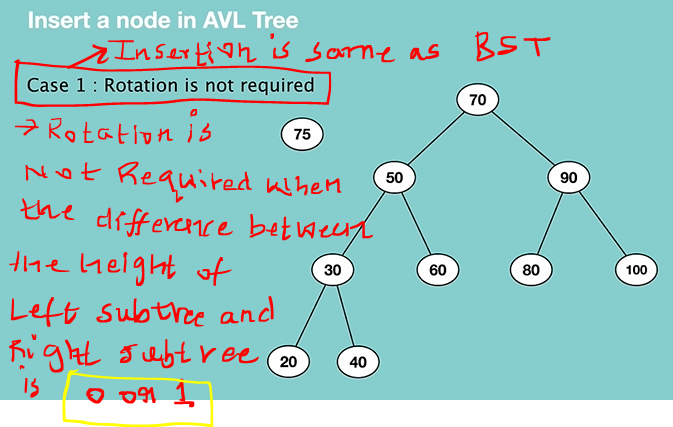

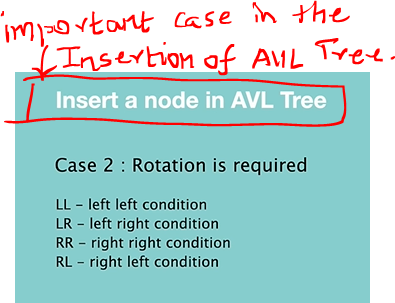
# How to find Which condition Satisfies
> # Find the Grand Child of the unbalanced Node

> # If we have Two Grand Childs , then choose a grand child , with greatest height from leaf Node

# 01 Left Left Condition
> # Unbalanced Node : Rotate Right

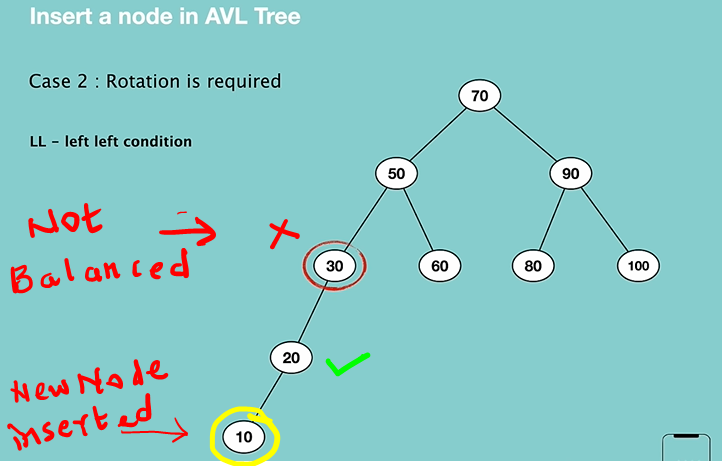

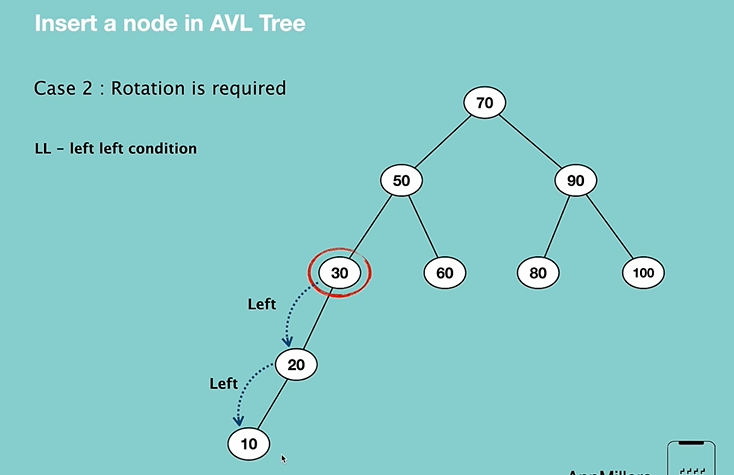

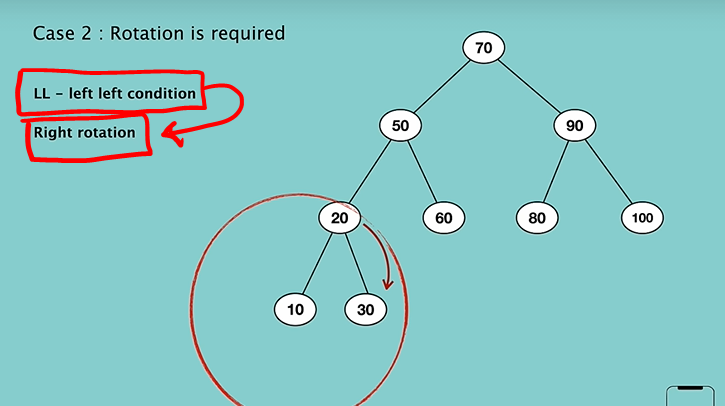

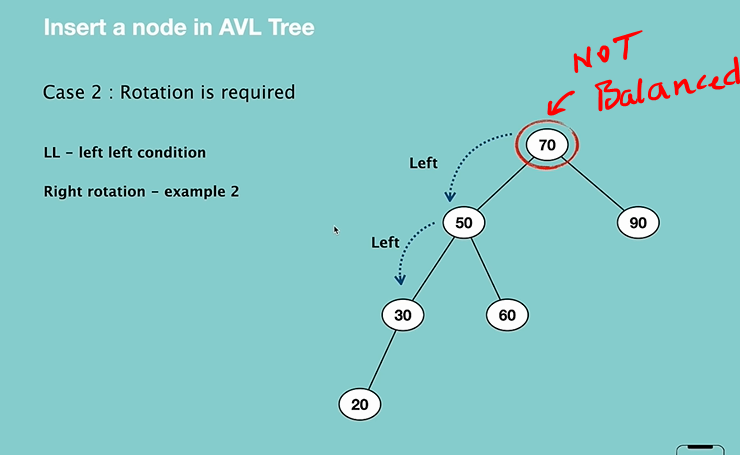

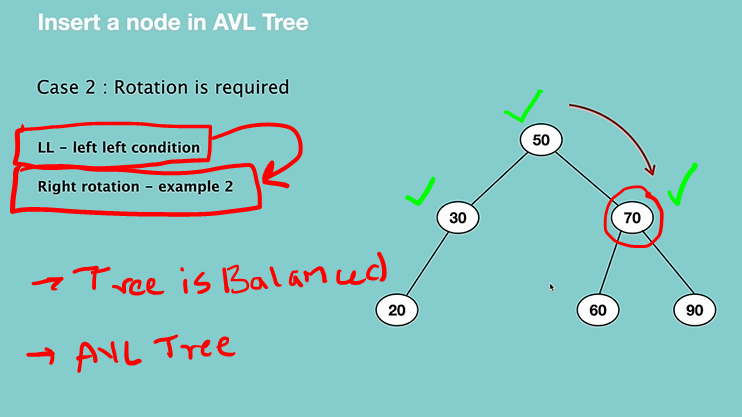

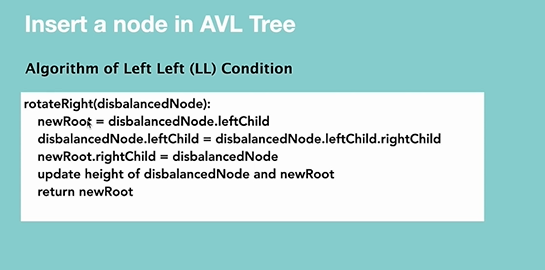

### Time Complexity : $O(1)$   , Space Complexity : $O(1)$ 
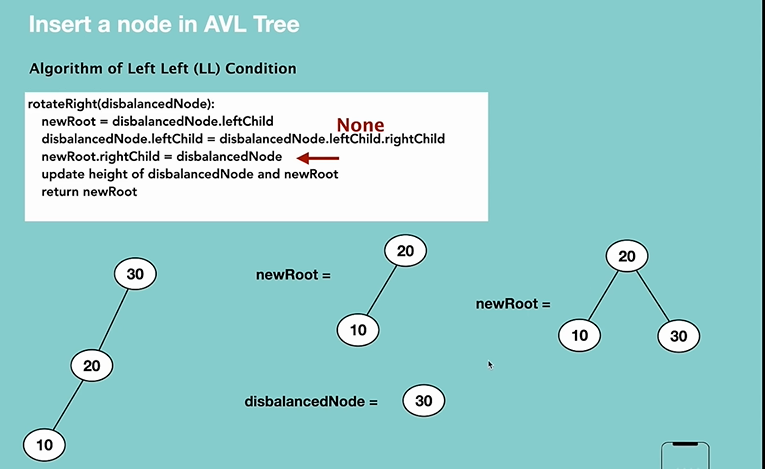

# 02 Left Right Condition
> # Unbalanced Node Left Child  : Rotate Left

> # Unbalanced Node   : Rotate Right

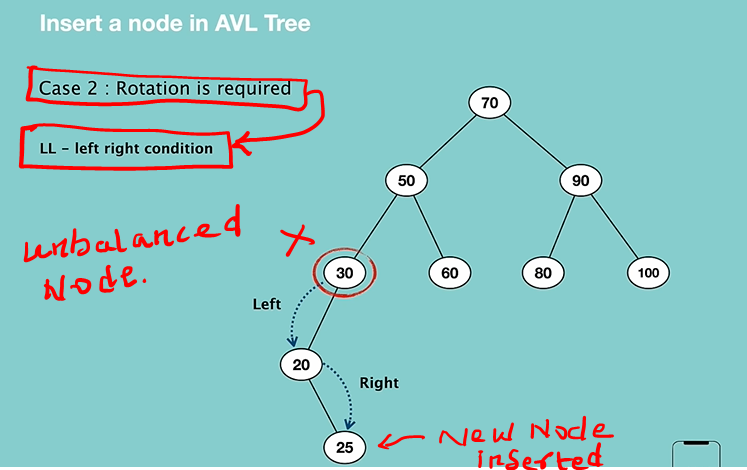

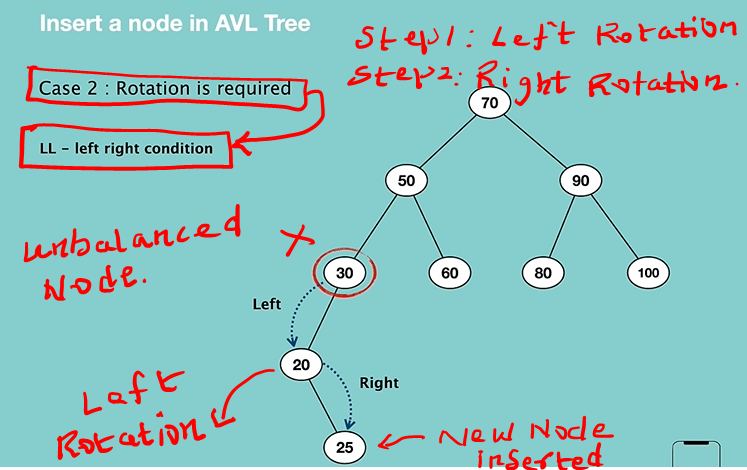

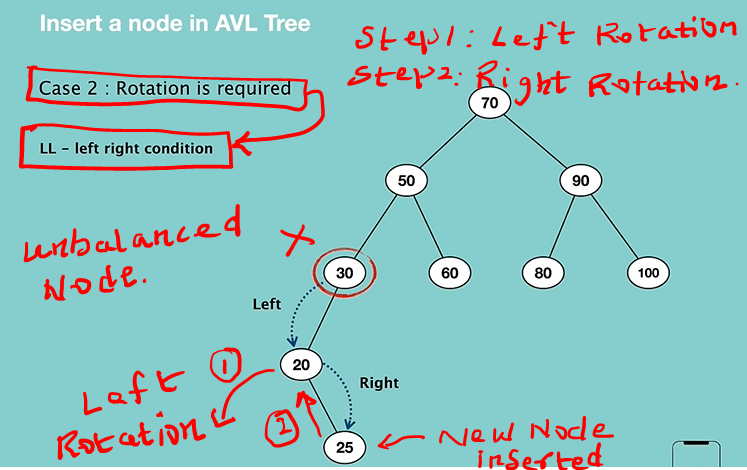

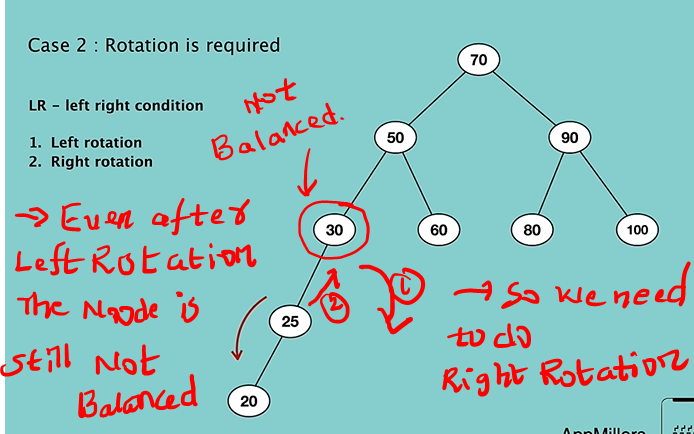

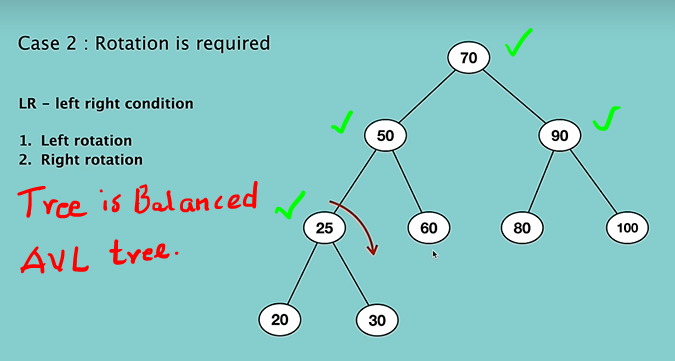

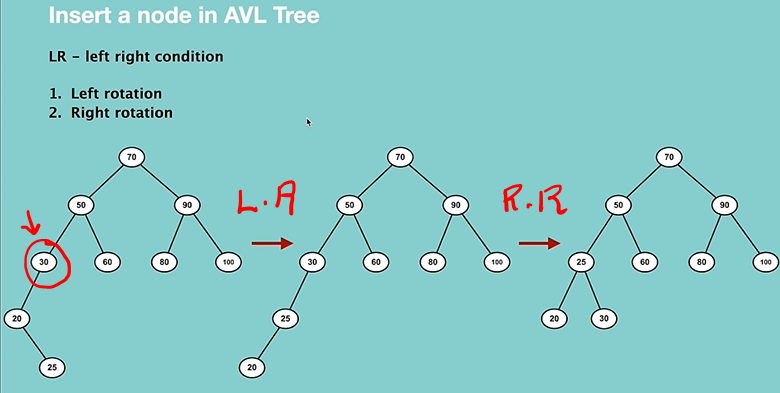

### Time Complexity : $O(1)$   , Space Complexity : $O(1)$ 
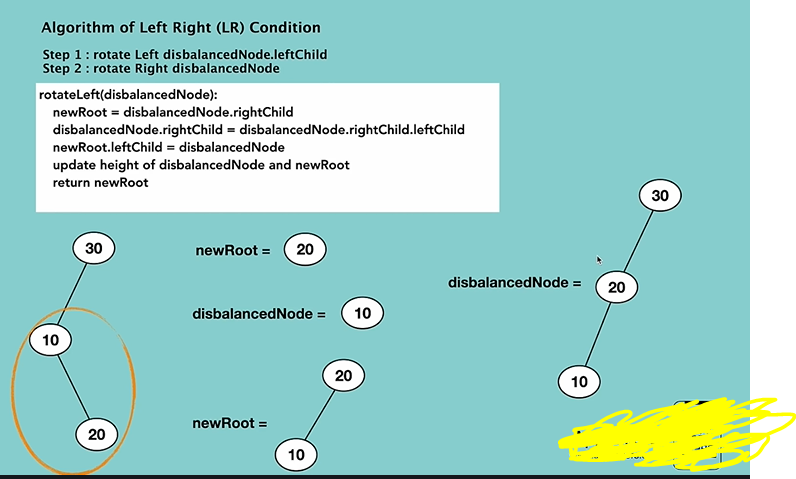

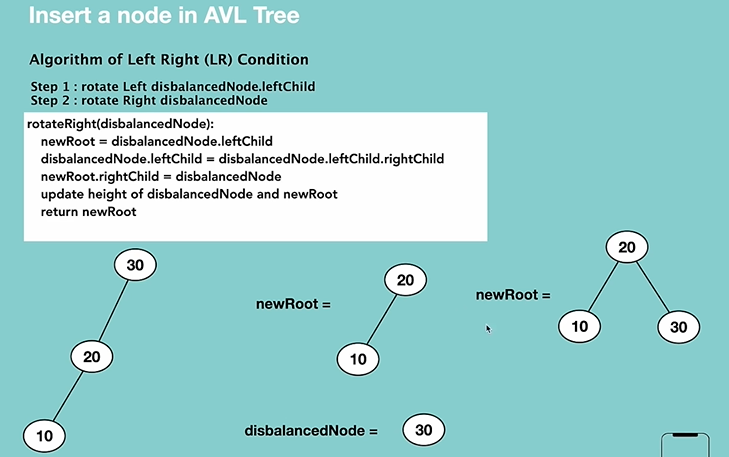

# 03 Right Right Condition

> # Unbalanced Node : Rotate Left

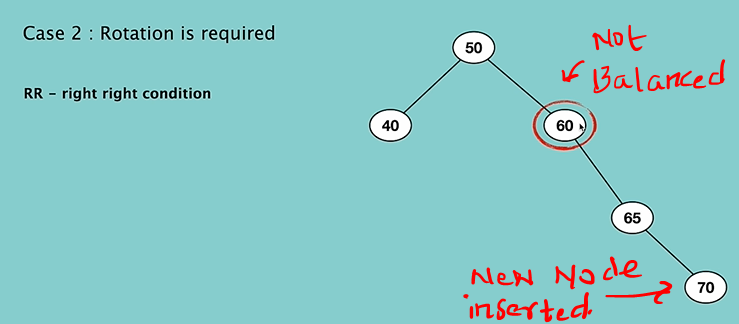

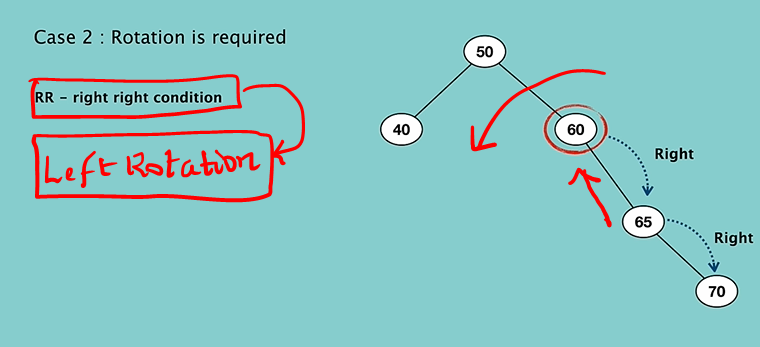

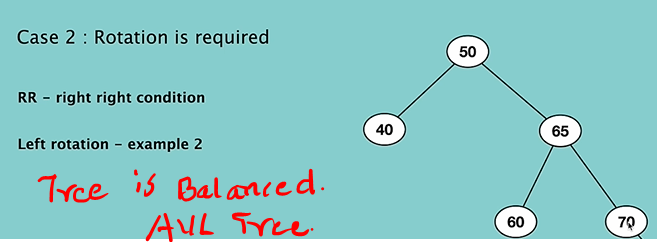

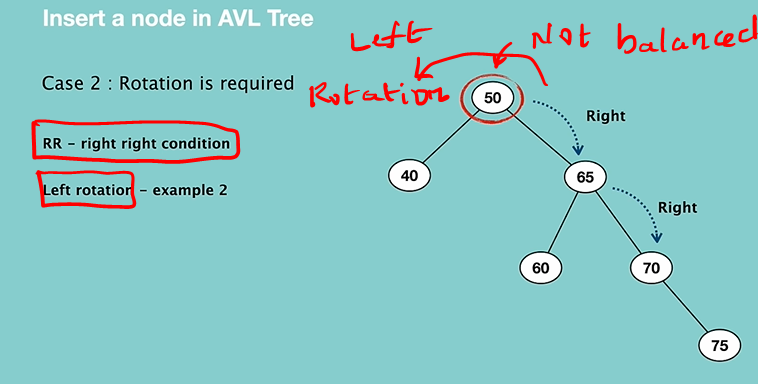

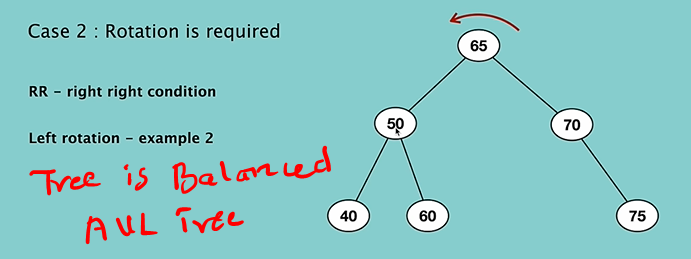

### Time Complexity : $O(1)$   , Space Complexity : $O(1)$ 
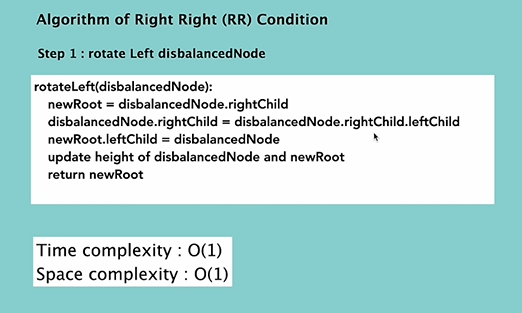

# 04 Right Left
> # Unbalanced Node Right Child  : Rotate Right

> # Unbalanced Node   : Rotate Left



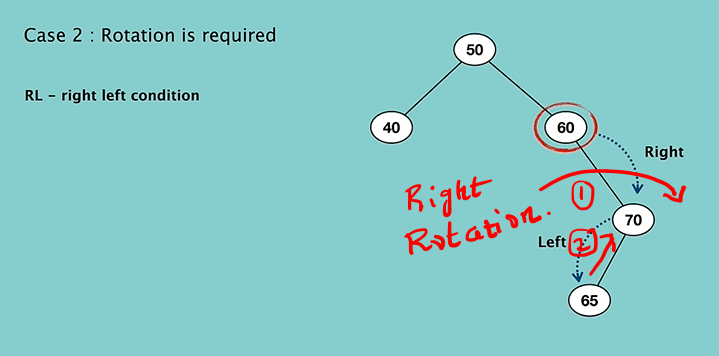

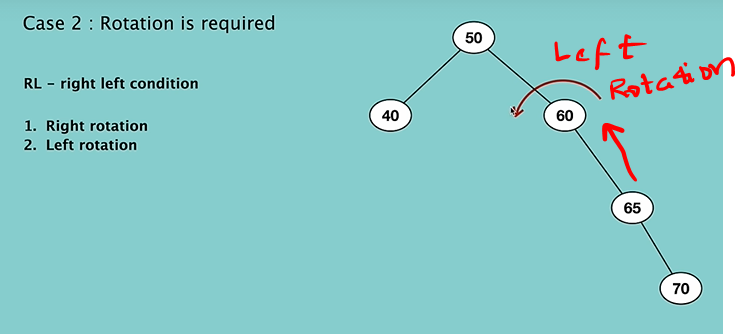

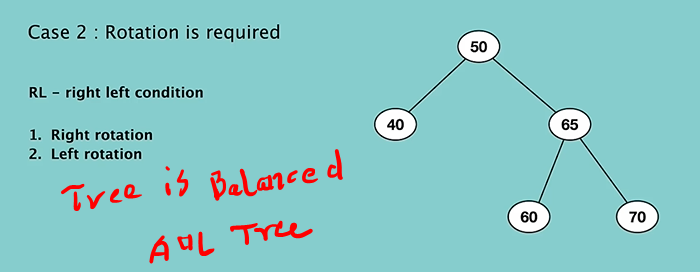

### Time Complexity : $O(1)$   , Space Complexity : $O(1)$ 
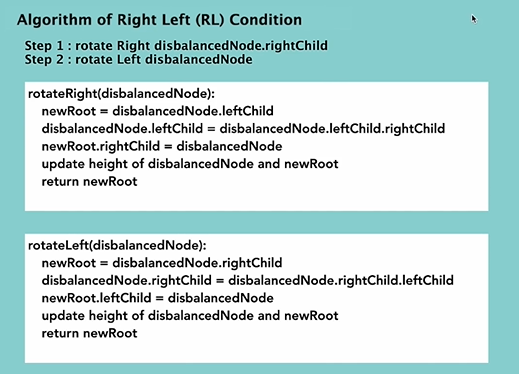

### Try with an Example 30 , 25 , 35 , 20 , 15 , 5 , 10 , 50 , 60 , 70 , 65
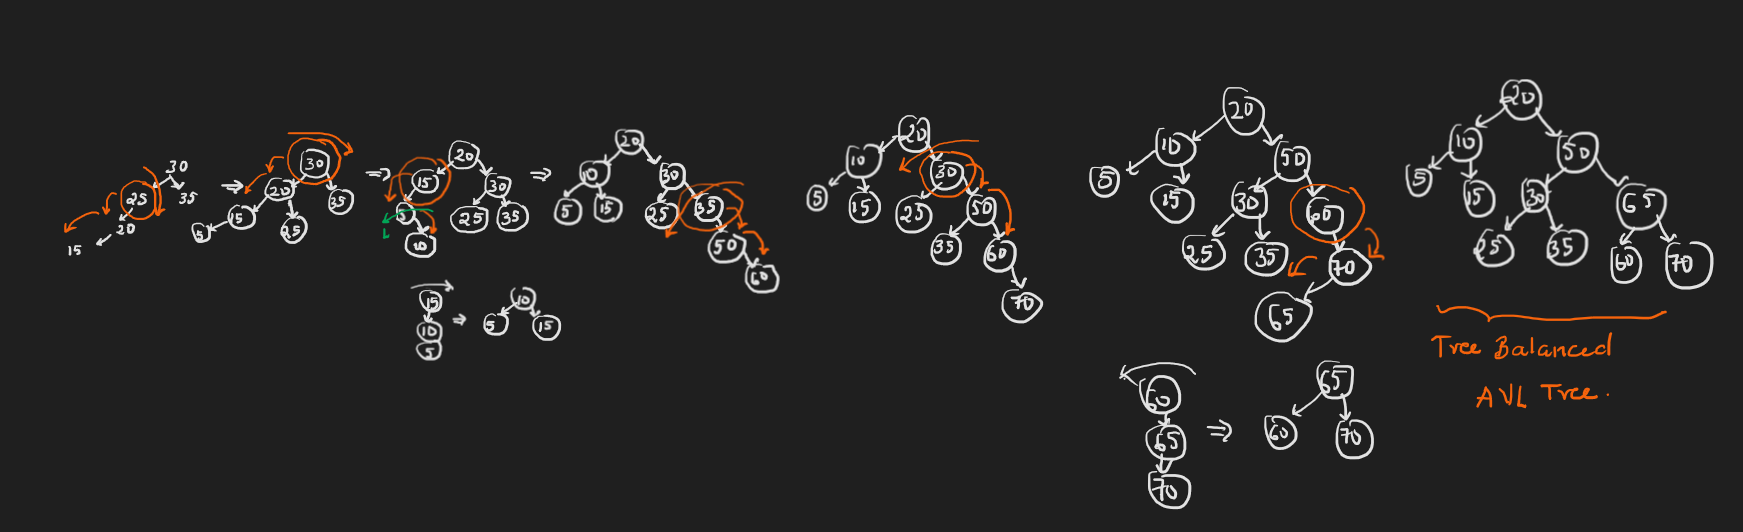



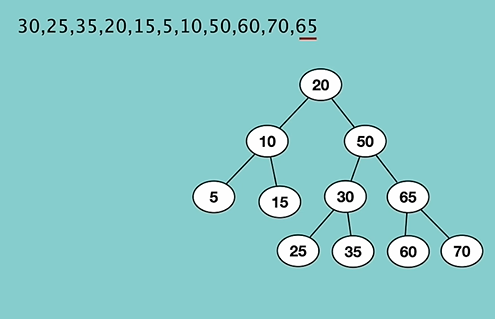

In [38]:
def getHeight(rootNode):
    if not rootNode:
        return 0
    return rootNode.height



In [39]:
def rightRotate(disbalanceNode):
    newRoot = disbalanceNode.leftChild
    disbalanceNode.leftChild = disbalanceNode.leftChild.rightChild
    newRoot.rightChild = disbalanceNode
    disbalanceNode.height = 1 + max(getHeight(disbalanceNode.leftChild), getHeight(disbalanceNode.rightChild))
    newRoot.height = 1 + max(getHeight(newRoot.leftChild), getHeight(newRoot.rightChild))
    return newRoot



In [40]:
def leftRotate(disbalanceNode):
    newRoot = disbalanceNode.rightChild
    disbalanceNode.rightChild = disbalanceNode.rightChild.leftChild
    newRoot.leftChild = disbalanceNode
    disbalanceNode.height = 1 + max(getHeight(disbalanceNode.leftChild), getHeight(disbalanceNode.rightChild))
    newRoot.height = 1 + max(getHeight(newRoot.leftChild), getHeight(newRoot.rightChild))
    return newRoot



In [41]:
def getBalance(rootNode):
    if not rootNode:
        return 0
    return getHeight(rootNode.leftChild) - getHeight(rootNode.rightChild)



In [42]:
def insertNode(rootNode, nodeValue):
    if not rootNode:
        return AVLNode(nodeValue)
    elif nodeValue < rootNode.data:
        rootNode.leftChild = insertNode(rootNode.leftChild, nodeValue)
    else:
        rootNode.rightChild = insertNode(rootNode.rightChild, nodeValue)
    
    rootNode.height = 1 + max(getHeight(rootNode.leftChild), getHeight(rootNode.rightChild))
    balance = getBalance(rootNode)
    if balance > 1 and nodeValue < rootNode.leftChild.data:
        return rightRotate(rootNode)
    if balance > 1 and nodeValue > rootNode.leftChild.data:
        rootNode.leftChild = leftRotate(rootNode.leftChild)
        return rightRotate(rootNode)
    if balance < -1 and nodeValue > rootNode.rightChild.data:
        return leftRotate(rootNode)
    if balance < -1 and nodeValue < rootNode.rightChild.data:
        rootNode.rightChild = rightRotate(rootNode.rightChild)
        return leftRotate(rootNode)
    return rootNode



In [43]:
def getMinValueNode(rootNode):
    if rootNode is None or rootNode.leftChild is None:
        return rootNode
    return getMinValueNode(rootNode.leftChild)



In [44]:
def deleteNode(rootNode, nodeValue):
    if not rootNode:
        return rootNode
    elif nodeValue < rootNode.data:
        rootNode.leftChild = deleteNode(rootNode.leftChild, nodeValue)
    elif nodeValue > rootNode.data:
        rootNode.rightChild = deleteNode(rootNode.rightChild, nodeValue)
    else:
        if rootNode.leftChild is None:
            temp = rootNode.rightChild
            rootNode = None
            return temp
        elif rootNode.rightChild is None:
            temp = rootNode.leftChild
            rootNode = None
            return temp
        temp = getMinValueNode(rootNode.rightChild)
        rootNode.data = temp.data
        rootNode.rightChild = deleteNode(rootNode.rightChild, temp.data)
    balance = getBalance(rootNode)
    if balance > 1 and getBalance(rootNode.leftChild) >= 0:
        return rightRotate(rootNode)
    if balance < -1 and getBalance(rootNode.rightChild) <= 0:
        return leftRotate(rootNode)
    if balance > 1 and getBalance(rootNode.leftChild) < 0:
        rootNode.leftChild = leftRotate(rootNode.leftChild)
        return rightRotate(rootNode)
    if balance < -1 and getBalance(rootNode.rightChild) > 0:
        rootNode.rightChild = rightRotate(rootNode.rightChild)
        return leftRotate(rootNode)
    
    return rootNode



In [45]:
def deleteAVL(rootNode):
    rootNode.data = None
    rootNode.leftChild = None
    rootNode.rightChild = None
    return "The AVL has been successfully deleted"




In [46]:

newAVL = AVLNode(5)
newAVL = insertNode(newAVL, 10)
newAVL = insertNode(newAVL, 15)
newAVL = insertNode(newAVL, 20)
deleteAVL(newAVL)
levelOrderTraversal(newAVL)


None


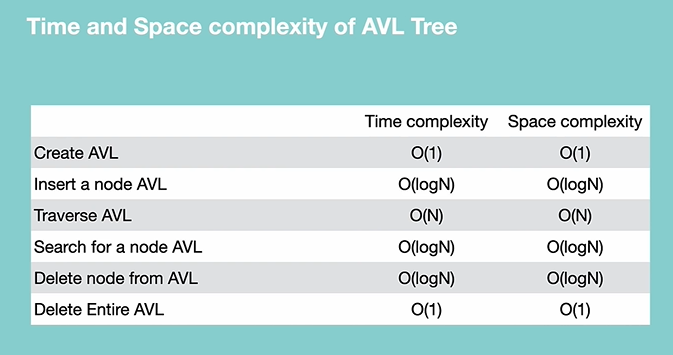